In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

База без разбиения по дням

In [4]:
knn_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/knn_data.csv')
avg_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/avg_data.csv')
moda_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/moda_data.csv')
knn_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/knn_data_clear.csv')
avg_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/avg_data_clear.csv')
moda_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/moda_data_clear.csv')


Базы с разбиением по дням

In [6]:
knn_zero_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/knn_zero_day_data.csv')
avg_zero_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/avg_zero_day_data.csv')
moda_zero_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/moda_zero_day_data.csv')
knn_zero_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/knn_zero_day_data_clear.csv')
avg_zero_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/avg_zero_day_data_clear.csv')
moda_zero_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/moda_zero_day_data_clear.csv')

knn_one_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/knn_one_day_data.csv')
avg_one_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/avg_one_day_data.csv')
moda_one_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/moda_one_day_data.csv')
knn_one_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/knn_one_day_data_clear.csv')
avg_one_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/avg_one_day_data_clear.csv')
moda_one_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/moda_one_day_data_clear.csv')



knn_two_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/knn_two_day_data.csv')
avg_two_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/avg_two_day_data.csv')
moda_two_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/moda_two_day_data.csv')
knn_two_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/knn_two_day_data_clear.csv')
avg_two_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/avg_two_day_data_clear.csv')
moda_two_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/moda_two_day_data_clear.csv')


knn_three_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/knn_three_day_data.csv')
avg_three_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/avg_three_day_data.csv')
moda_three_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/moda_three_day_data.csv')
knn_three_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/knn_three_day_data_clear.csv')
avg_three_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/avg_three_day_data_clear.csv')
moda_three_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/moda_three_day_data_clear.csv')

Глупая модель

Оценка?

* стратифицированная
* 5-10 случайных разбивок и показать статистику результатов
* Loss - кросс-энтропия, показатели - F1 + accuracy + confusion matrix


TODO: 

* линейная модель (2 классов) - посмотреть коэффициенты (важность) для масштабированных данных [0, 1]
* random forest - важность переменных
* НС (colab + TF + softmax (2 и 7) + sigmoid/ReLU) 

TODO доп: 

* PCA для числовыхю Глянуть объясн.дисперсию
* feature selection (2^n)

In [7]:
def Linear_model_function (X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    regressor = LinearRegression()
    parameters = {   
        "fit_intercept": [True, False],
        "normalize": [True, False],
        "copy_X": [True, False],
        "positive": [True, False]
        }
    grid = GridSearchCV(estimator=regressor, param_grid = parameters, cv = 2, n_jobs=-1)
    grid.fit(X_train, y_train)

    feature_names = X.columns

    #model_coefficients = regressor.coef_

    #coefficients_df = pd.DataFrame(data = model_coefficients, 
                                  #index = feature_names, 
                                  #columns = ['Coefficient value'])
    #print(coefficients_df)
    print (grid.best_params_)
    y_pred = grid.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 


In [8]:
def SVC_model_function (X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    parameters = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}           
    clf = GridSearchCV( SVC(), parameters)
    clf.fit(X_train, y_train)
    print (clf.best_params_)
    y_pred = clf.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 


In [78]:
SVC_model_function (X,y)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
      Actual  Predicted
29       0.0        0.0
259      1.0        0.0
383      0.0        0.0
425      0.0        0.0
239      0.0        0.0
...      ...        ...
999      0.0        0.0
1556     1.0        0.0
513      0.0        0.0
422      0.0        0.0
1083     0.0        0.0

[323 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.90      0.96      0.93       272
     class 1       0.69      0.43      0.53        51

    accuracy                           0.88       323
   macro avg       0.79      0.70      0.73       323
weighted avg       0.87      0.88      0.87       323



In [9]:
def RF_model_function (X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    RF = RandomForestClassifier(random_state = 42)
    parameters = { 
        'n_estimators': [200, 500],
        'max_features': [None, 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }
    clf = GridSearchCV( RF, parameters,cv= 5)
    
    clf.fit(X_train, y_train)
    print (clf.best_params_)
    y_pred = clf.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 


In [66]:
RF_model_function (X,y)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
      Actual  Predicted
29       0.0        0.0
259      1.0        0.0
383      0.0        0.0
425      0.0        0.0
239      0.0        0.0
...      ...        ...
999      0.0        0.0
1556     1.0        0.0
513      0.0        0.0
422      0.0        0.0
1083     0.0        0.0

[323 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.86      1.00      0.92       272
     class 1       0.89      0.16      0.27        51

    accuracy                           0.86       323
   macro avg       0.88      0.58      0.60       323
weighted avg       0.87      0.86      0.82       323



In [19]:
def Keras_model_function (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
    print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
    print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
    model = Sequential()
    model.add(Dense(200, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size = 22,validation_data=(X_test, y_test))
    _, accuracy = model.evaluate(X_train, y_train)
    print('Accuracy train: %.2f' % (accuracy*100))
    
    y_pred = model.predict(X_test)
    #y_pred = y_pred.reshape(323,)
    #results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    #print(results)
    

    matrix = confusion_matrix(y_test, np.round(y_pred))
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 

    
    ax = sns.heatmap(matrix, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

Количество строк в y_train по классам: [1087  201]
Количество строк в y_test по классам: [268  55]
Epoch 1/50
59/59 [==============================] - 1s 8ms/step - loss: 0.4113 - accuracy: 0.8354 - val_loss: 0.3534 - val_accuracy: 0.8359
Epoch 2/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.8595 - val_loss: 0.3402 - val_accuracy: 0.8452
Epoch 3/50
59/59 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.8766 - val_loss: 0.3186 - val_accuracy: 0.8514
Epoch 4/50
59/59 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.8804 - val_loss: 0.3069 - val_accuracy: 0.8545
Epoch 5/50
59/59 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.8890 - val_loss: 0.3118 - val_accuracy: 0.8421
Epoch 6/50
59/59 [==============================] - 0s 5ms/step - loss: 0.2615 - accuracy: 0.8890 - val_loss: 0.3092 - val_accuracy: 0.8545
Epoch 7/50
59/59 [==============================] - 0s 5ms/st

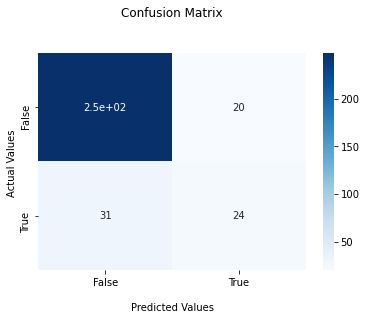

TODO
* classification report +
* добавить в colab +
* сделать выгрузку в файлы +
* пересмотреть архитектуру
* пересмотреть ошибку
* cv grid search +

Zero day

In [11]:
y = knn_zero_day_data['DEATH']
X = knn_zero_day_data.drop(columns = ['DEATH'])

In [12]:
Linear_model_function(X,y)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': True}
      Actual  Predicted
1246     0.0  -0.107294
813      0.0   0.008575
1173     0.0  -0.057781
534      0.0   0.168047
514      0.0   0.074637
...      ...        ...
1107     0.0   0.254176
1211     0.0   0.408230
1378     1.0   0.473030
1509     1.0   0.182285
1043     0.0  -0.012118

[316 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94       276
     class 1       0.67      0.20      0.31        40

    accuracy                           0.89       316
   macro avg       0.78      0.59      0.62       316
weighted avg       0.87      0.89      0.86       316



C:\Users\Rusin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [13]:
SVC_model_function (X,y)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      Actual  Predicted
1246     0.0        0.0
813      0.0        0.0
1173     0.0        0.0
534      0.0        0.0
514      0.0        0.0
...      ...        ...
1107     0.0        0.0
1211     0.0        0.0
1378     1.0        1.0
1509     1.0        0.0
1043     0.0        0.0

[316 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94       276
     class 1       0.57      0.30      0.39        40

    accuracy                           0.88       316
   macro avg       0.74      0.63      0.66       316
weighted avg       0.86      0.88      0.87       316



In [14]:
RF_model_function (X,y)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'n_estimators': 500}
      Actual  Predicted
1246     0.0        0.0
813      0.0        0.0
1173     0.0        0.0
534      0.0        0.0
514      0.0        0.0
...      ...        ...
1107     0.0        0.0
1211     0.0        0.0
1378     1.0        0.0
1509     1.0        0.0
1043     0.0        0.0

[316 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.90      1.00      0.94       276
     class 1       0.89      0.20      0.33        40

    accuracy                           0.90       316
   macro avg       0.89      0.60      0.63       316
weighted avg       0.89      0.90      0.87       316



Количество строк в y_train по классам: [1051  209]
Количество строк в y_test по классам: [272  44]
Epoch 1/50
58/58 [==============================] - 3s 11ms/step - loss: 0.4143 - accuracy: 0.8373 - val_loss: 0.3169 - val_accuracy: 0.8861
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 0.3289 - accuracy: 0.8643 - val_loss: 0.3661 - val_accuracy: 0.8386
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2950 - accuracy: 0.8786 - val_loss: 0.3073 - val_accuracy: 0.8797
Epoch 4/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2612 - accuracy: 0.8889 - val_loss: 0.3161 - val_accuracy: 0.8861
Epoch 5/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2345 - accuracy: 0.9008 - val_loss: 0.3299 - val_accuracy: 0.8829
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 0.2077 - accuracy: 0.9135 - val_loss: 0.3752 - val_accuracy: 0.8861
Epoch 7/50
58/58 [==============================] - 0s 6ms/s

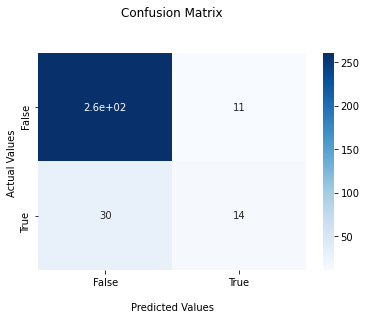

In [20]:
Keras_model_function (X,y)

First day

In [21]:
y = knn_one_day_data['DEATH']
X = knn_one_day_data.drop(columns = ['DEATH'])

Количество строк в y_train по классам: [1051  210]
Количество строк в y_test по классам: [272  44]
Epoch 1/50
58/58 [==============================] - 1s 9ms/step - loss: 0.4341 - accuracy: 0.8287 - val_loss: 0.3155 - val_accuracy: 0.8766
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 0.3225 - accuracy: 0.8668 - val_loss: 0.2687 - val_accuracy: 0.8924
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.8660 - val_loss: 0.2489 - val_accuracy: 0.9019
Epoch 4/50
58/58 [==============================] - 0s 8ms/step - loss: 0.2615 - accuracy: 0.8866 - val_loss: 0.2566 - val_accuracy: 0.8956
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 0.2370 - accuracy: 0.9009 - val_loss: 0.2407 - val_accuracy: 0.8956
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 0.2148 - accuracy: 0.9064 - val_loss: 0.2565 - val_accuracy: 0.9051
Epoch 7/50
58/58 [==============================] - 0s 5ms/st

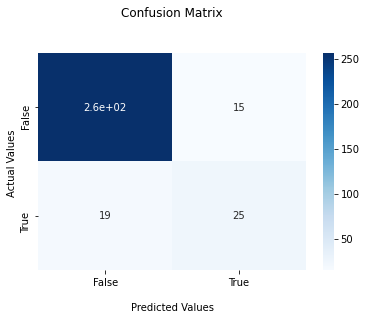

In [22]:
Keras_model_function (X,y)

Second day

In [23]:
y = knn_two_day_data['DEATH']
X = knn_two_day_data.drop(columns = ['DEATH'])

Количество строк в y_train по классам: [1060  201]
Количество строк в y_test по классам: [263  53]
Epoch 1/50
58/58 [==============================] - 1s 10ms/step - loss: 0.4039 - accuracy: 0.8517 - val_loss: 0.3684 - val_accuracy: 0.8671
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 0.3219 - accuracy: 0.8628 - val_loss: 0.3383 - val_accuracy: 0.8576
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2789 - accuracy: 0.8842 - val_loss: 0.3430 - val_accuracy: 0.8354
Epoch 4/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2494 - accuracy: 0.8985 - val_loss: 0.3702 - val_accuracy: 0.8639
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 0.2205 - accuracy: 0.9080 - val_loss: 0.3853 - val_accuracy: 0.8481
Epoch 6/50
58/58 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9310 - val_loss: 0.4135 - val_accuracy: 0.8544
Epoch 7/50
58/58 [==============================] - 0s 5ms/s

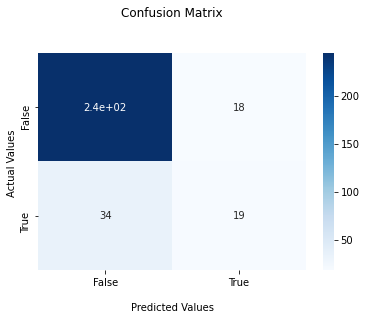

In [24]:
Keras_model_function (X,y)

Third day

In [25]:
y = knn_three_day_data['DEATH']
X = knn_three_day_data.drop(columns = ['DEATH'])

KeyError: 'DEATH'

In [ ]:
Keras_model_function (X,y)